In [3]:
import random
Nnumber = 16540081
# Seed the random number generator with N-number
random.seed(Nnumber)
random.random()

0.0402619140233188

In [4]:
#Load the dataset from the excel
import pandas as pd

file_path = 'spotify52kData.csv'
spotify_data = pd.read_csv(file_path)
spotify_data_cleaned = spotify_data.dropna()

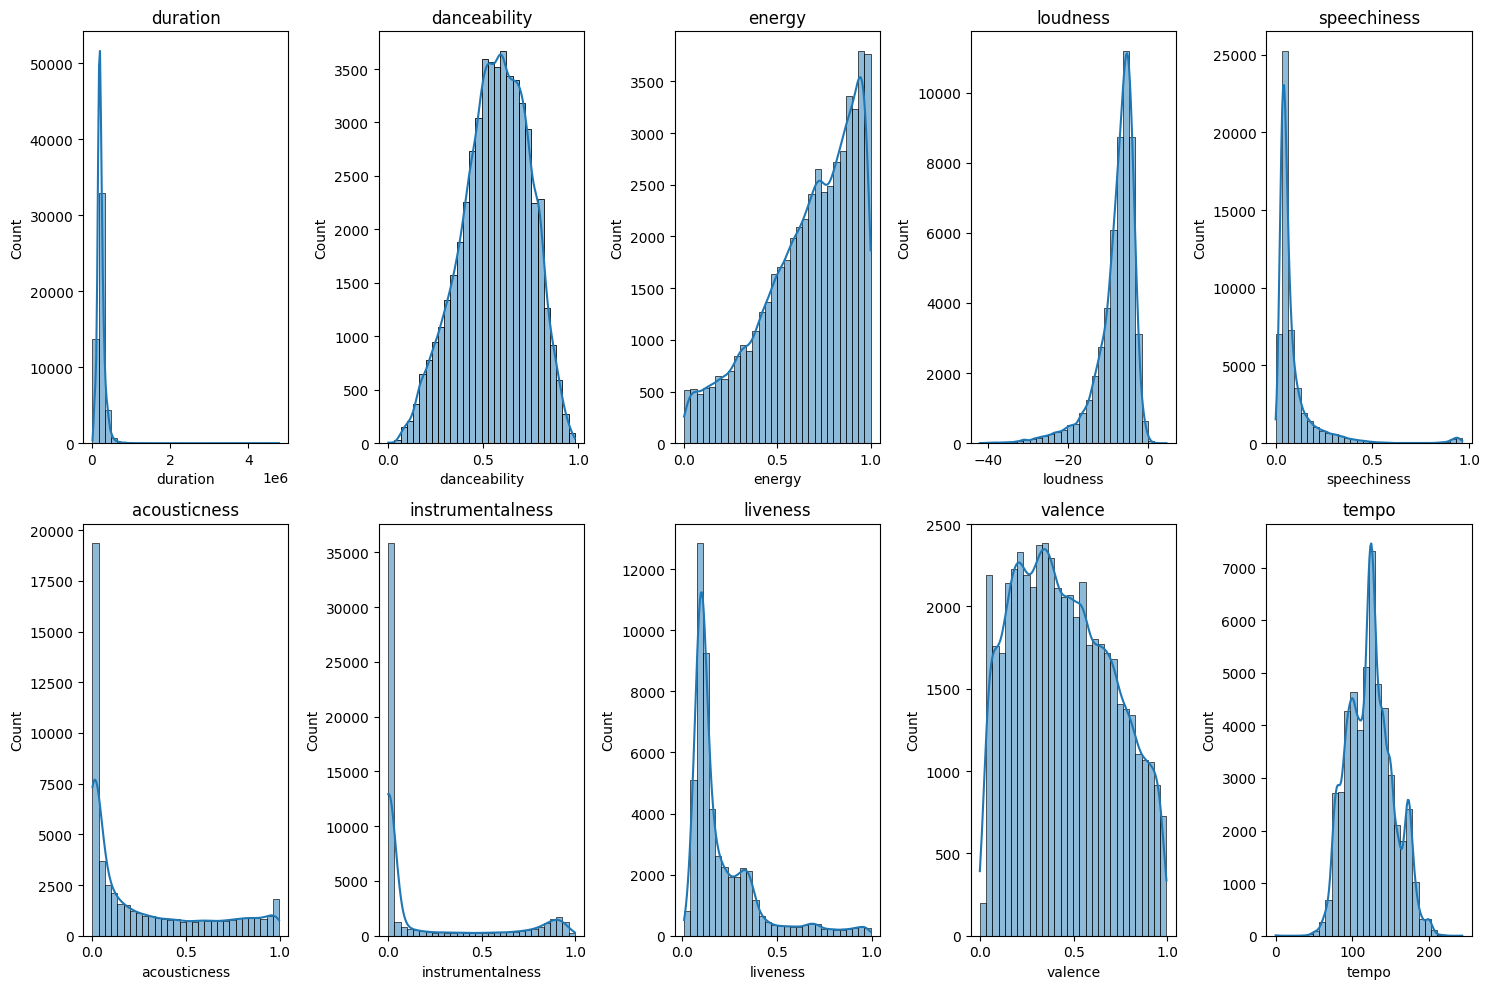

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of all 10 song features
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Create a 2x5 figure with histograms for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 5, i + 1)
    sns.histplot(spotify_data_cleaned[feature], kde=True, bins=30)
    plt.title(feature)
    plt.tight_layout()

plt.show()

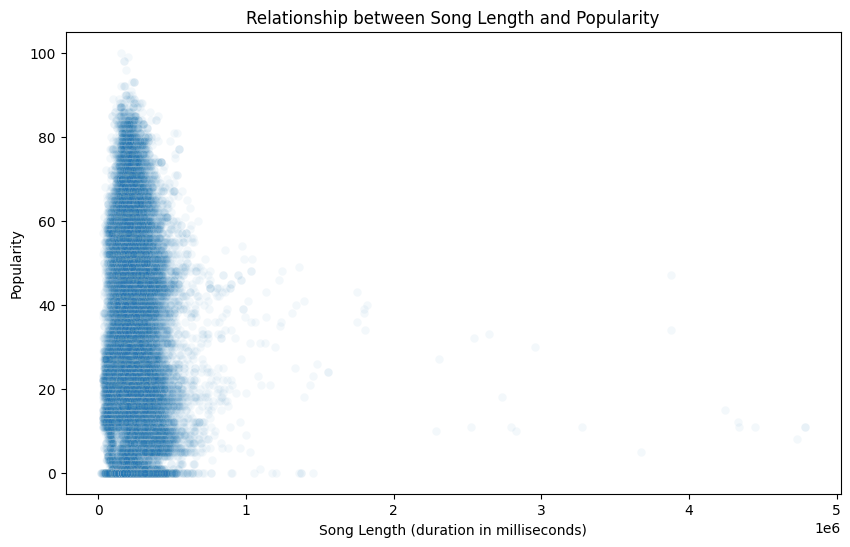

Correlation coefficient:-0.05465119593637627


In [6]:
# Generate a scatterplot to find the relationship between song length and popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_data_cleaned, x='duration', y='popularity', alpha=0.05)
plt.title('Relationship between Song Length and Popularity')
plt.xlabel('Song Length (duration in milliseconds)')
plt.ylabel('Popularity')
plt.show()

#Find the Pearson correlation coefficient between duration and popularity
Q2_correlation = spotify_data_cleaned['duration'].corr(spotify_data_cleaned['popularity'])
print("Correlation coefficient:", end = "")
print(Q2_correlation)

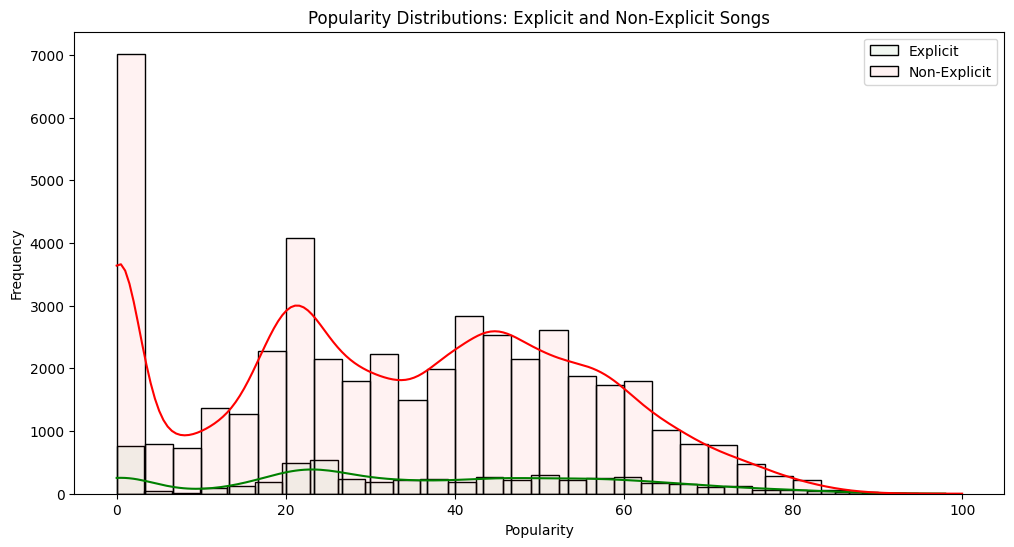

U statistic: 139361273.5
p-value: 3.0679199339114678e-19
Median of popularity for explicitly rated songs: 34.0
Median of popularity for non-explicitly rated songs: 33.0


In [7]:
# Find the distributions of popularity for explicit and non-explicit songs
plt.figure(figsize=(12, 6))
sns.histplot(data=spotify_data_cleaned[spotify_data_cleaned['explicit'] == True]['popularity'], color='green', kde=True, label='Explicit', bins=30, alpha=0.05)
sns.histplot(data=spotify_data_cleaned[spotify_data_cleaned['explicit'] == False]['popularity'], color='red', kde=True, label='Non-Explicit', bins=30, alpha=0.05)

plt.title('Popularity Distributions: Explicit and Non-Explicit Songs')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

from scipy.stats import mannwhitneyu

popularity_explicit = spotify_data_cleaned[spotify_data_cleaned['explicit'] == True]['popularity']
popularity_non_explicit = spotify_data_cleaned[spotify_data_cleaned['explicit'] == False]['popularity']

# Generating the Mann-Whitney U test
Q3_u_statistic, Q3_p_value = mannwhitneyu(popularity_explicit, popularity_non_explicit, alternative='two-sided')

print("U statistic: ", end = "")
print(Q3_u_statistic)
print("p-value: ", end = "")
print(Q3_p_value)

# Find the median popularity for explicit and non-explicit songs to compare
median_popularity_explicit = popularity_explicit.median()
median_popularity_non_explicit = popularity_non_explicit.median()

print("Median of popularity for explicitly rated songs: ", end = "")
print(median_popularity_explicit)
print("Median of popularity for non-explicitly rated songs: ", end = "")
print(median_popularity_non_explicit)

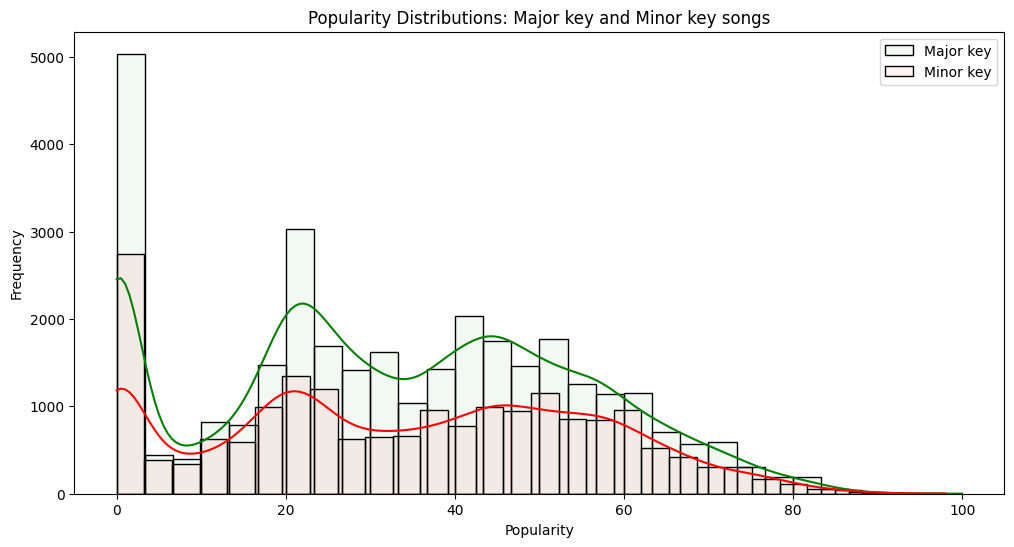

U statistic: 309702373.0
p-value: 2.0175287554899416e-06
Median of popularity for songs in major key: 32.0
Median of popularity for songs in minor key: 34.0


In [8]:
# Find the distributions of popularity for major key and minor key songs
plt.figure(figsize=(12, 6))
sns.histplot(data=spotify_data_cleaned[spotify_data_cleaned['mode'] == 1]['popularity'], color='green', kde=True, label='Major key', bins=30, alpha=0.05)
sns.histplot(data=spotify_data_cleaned[spotify_data_cleaned['mode'] == 0]['popularity'], color='red', kde=True, label='Minor key', bins=30, alpha=0.05)

plt.title('Popularity Distributions: Major key and Minor key songs')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

popularity_major = spotify_data_cleaned[spotify_data_cleaned['mode'] == 1]['popularity']
popularity_minor = spotify_data_cleaned[spotify_data_cleaned['mode'] == 0]['popularity']

# Generating the Mann-Whitney U test
Q4_u_statistic, Q4_p_value = mannwhitneyu(popularity_major, popularity_minor, alternative='two-sided')

print("U statistic: ", end = "")
print(Q4_u_statistic)
print("p-value: ", end = "")
print(Q4_p_value)

# Find the median popularity for explicit and non-explicit songs to compare
median_popularity_major = popularity_major.median()
median_popularity_minor = popularity_minor.median()

print("Median of popularity for songs in major key: ", end = "")
print(median_popularity_major)
print("Median of popularity for songs in minor key: ", end = "")
print(median_popularity_minor)

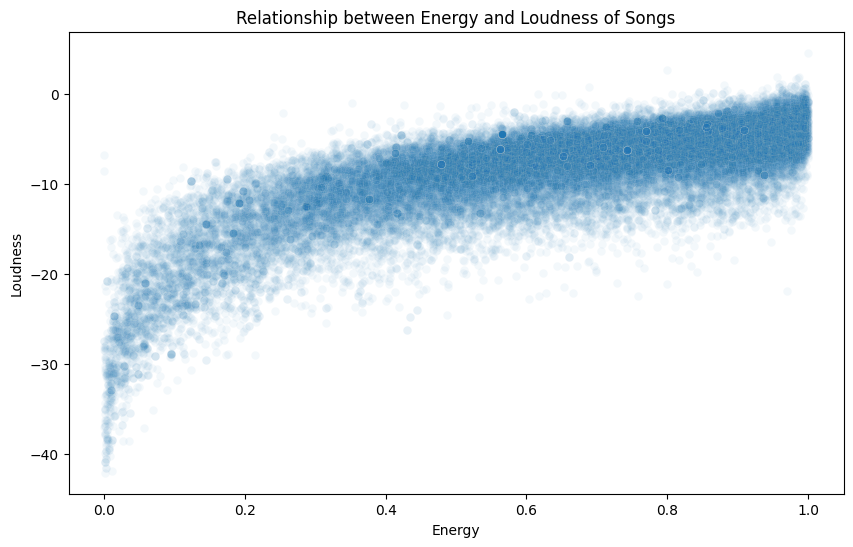

Correlation coefficient:0.7748808291850184


In [9]:
# Create a scatterplot to examine the relationship between energy and loudness
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_data_cleaned, x='energy', y='loudness', alpha=0.05)
plt.title('Relationship between Energy and Loudness of Songs')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.show()

#Find the Pearson correlation coefficient between energy and loudness
Q5_correlation = spotify_data_cleaned['energy'].corr(spotify_data_cleaned['loudness'])
print("Correlation coefficient:", end = "")
print(Q5_correlation)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Creating a dictionary to store RMSE and R-Squared values for each feature
modelPerformance = {}

# Conducting simple linear regression and analyzing the results for each feature
for feature in features:
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(spotify_data_cleaned[feature].values.reshape(-1, 1), spotify_data_cleaned['popularity'], test_size=0.3, random_state=Nnumber)
    
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predicting and calculating RMSE and R-Squared
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r_squared = r2_score(y_test, predictions)

    # Storing the results of RMSE and R-Squared
    modelPerformance[feature] = {'RMSE': rmse, 'R-Squared': r_squared}

print(modelPerformance)

# Find the feature with the lowest RMSE and the highest R-Squared in the dictionary
lowest_rmse = float('inf')  
highest_r2 = float('-inf') 
best_feature_rmse = None
best_feature_r2 = None

for feature, results in modelPerformance.items():
    if results['RMSE'] < lowest_rmse:
        lowest_rmse = results['RMSE']
        best_feature_rmse = feature

    if results['R-Squared'] > highest_r2:
        highest_r2 = results['R-Squared']
        best_feature_r2 = feature
print()
if best_feature_rmse == best_feature_r2:
    print("Best feature for prediction: ", best_feature_rmse)
    print("RMSE:", lowest_rmse)
    print("R-Squared:", highest_r2)

{'duration': {'RMSE': 21.62770780163697, 'R-Squared': 0.0032224931550222102}, 'danceability': {'RMSE': 21.64588164749077, 'R-Squared': 0.0015465973924084775}, 'energy': {'RMSE': 21.626583017384846, 'R-Squared': 0.0033261685420752363}, 'loudness': {'RMSE': 21.627156819145167, 'R-Squared': 0.0032732798554712117}, 'speechiness': {'RMSE': 21.64054948529217, 'R-Squared': 0.002038447051464831}, 'acousticness': {'RMSE': 21.651872033025843, 'R-Squared': 0.0009938873166602802}, 'instrumentalness': {'RMSE': 21.39542404026124, 'R-Squared': 0.0245184968566432}, 'liveness': {'RMSE': 21.64911278818979, 'R-Squared': 0.0012484913355187421}, 'valence': {'RMSE': 21.647551206851258, 'R-Squared': 0.0013925688765975552}, 'tempo': {'RMSE': 21.66331581902167, 'R-Squared': -6.241242160309746e-05}}

Best feature for prediction:  instrumentalness
RMSE: 21.39542404026124
R-Squared: 0.0245184968566432


In [11]:
# Splitting the dataset into training and testing sets
X_10 = spotify_data_cleaned[features]
y_10 = spotify_data_cleaned["popularity"]
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y_10, test_size=0.3, random_state=Nnumber)

# Conducting and training the multiple regression model
multi_reg_model = LinearRegression()
multi_reg_model.fit(X_train_10, y_train_10)

# Predicting and calculating RMSE and R-Squared
predictions_10 = multi_reg_model.predict(X_test_10)
rmse_multi = np.sqrt(mean_squared_error(y_test_10, predictions_10))
r_squared_multi = r2_score(y_test_10, predictions_10)

print("RMSE: ", end = "")
print(rmse_multi)
print("R-Squared: ", end = "")
print(r_squared_multi)

#Compare with model in Q6
if (rmse_multi < lowest_rmse) and (r_squared_multi > highest_r2) :
    print("The multiple regression model is improved compared to the model in question 6) ", end = "")
    print("with decrease of RMSE for ", end = "")
    print(lowest_rmse - rmse_multi, end = "")
    print(" and increase of R-Squared for ", end = "")
    print(r_squared_multi - highest_r2)

RMSE: 21.09702301294336
R-Squared: 0.051538742827321404
The multiple regression model is improved compared to the model in question 6) with decrease of RMSE for 0.29840102731787965 and increase of R-Squared for 0.027020245970678203


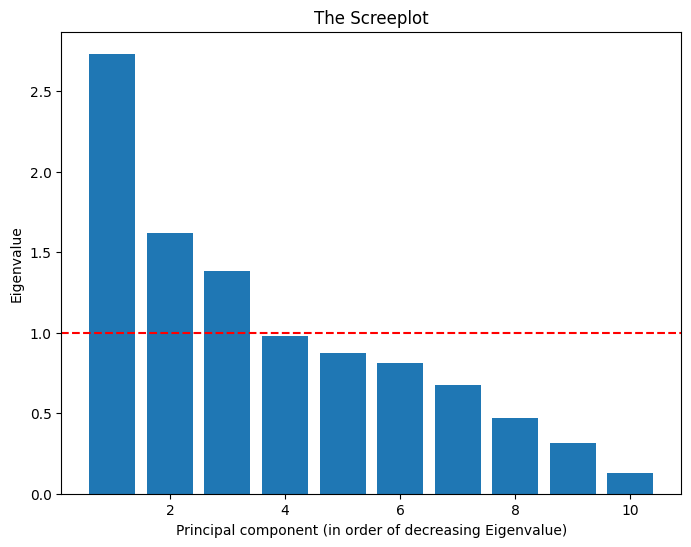

Number of meaningful principal components to extract: 3
Proportion of the variance these principal components account for: 0.5735819422797213


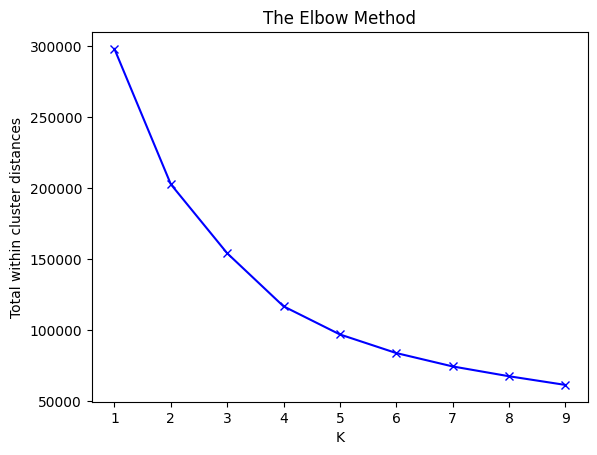

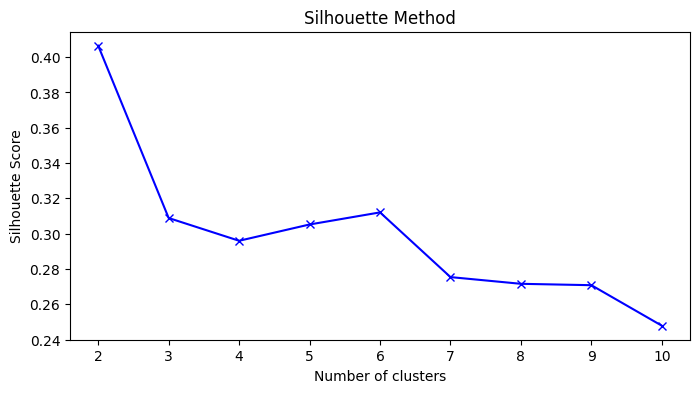

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardizing the features through z-score normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(spotify_data_cleaned[features])

# Performing PCA
pca = PCA()
pca.fit(X_scaled)

principal_components = pca.fit_transform(X_scaled)
# Variance explained by each component (Eigenvalues)
eigenvalues = pca.explained_variance_

# Using Kaiser criterion (eigenvalues > 1) to find meaningful principal components to extract
num_components = sum(eigenvalues > 1)

# Proportion of variance the selected principal components account for
variance_explained = sum(pca.explained_variance_ratio_[eigenvalues > 1])

# Creating a histogram of the eigenvalues to determine the number of factors
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues)
plt.title('The Screeplot')
plt.xlabel('Principal component (in order of decreasing Eigenvalue)')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='dashed')
plt.show()

print("Number of meaningful principal components to extract: ", end = "")
print(num_components)
print("Proportion of the variance these principal components account for: ", end = "")
print(variance_explained)

#Using elbow method to find the number of clusters in K-means clustering

from sklearn.cluster import KMeans

new_pca = PCA(n_components = num_components)  
X_pca = new_pca.fit_transform(X_scaled)

distances = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_pca)  
    distances.append(kmeanModel.inertia_)

#Plotting the elbow method
plt.plot(K, distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Total within cluster distances')
plt.title('The Elbow Method')
plt.show()

#Using silhouette scores to find the number of clusters in K-means clustering
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 11)  

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


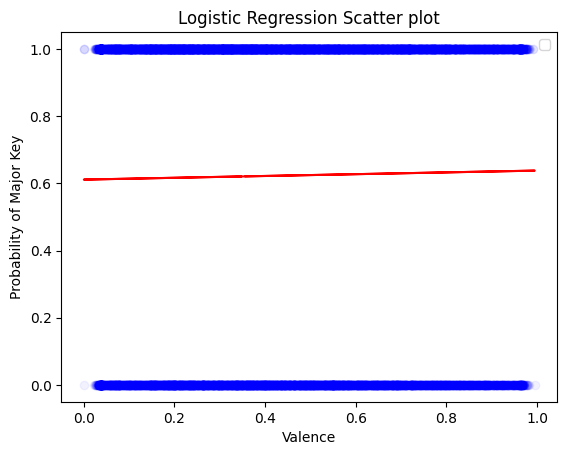

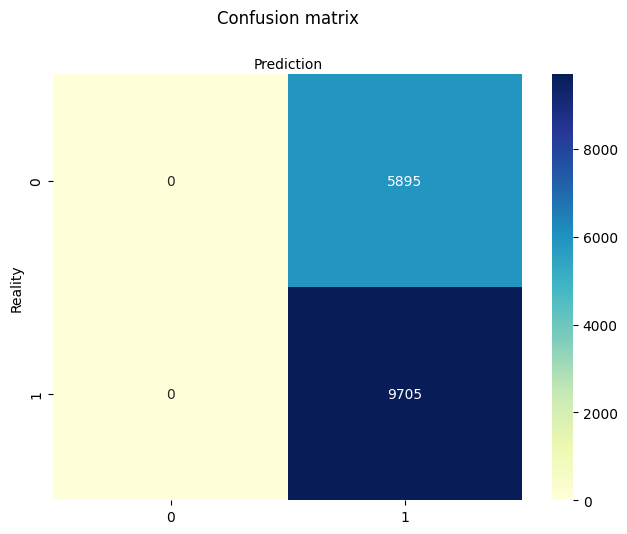

/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


AUC for valence: 0.5050197099420173

{'duration': {'AUC': 0.5225406051898259, 'Confusion Matrix': array([[   0, 5895],
       [   0, 9705]])}, 'danceability': {'AUC': 0.5446454286087591, 'Confusion Matrix': array([[5894,    1],
       [9703,    2]])}, 'energy': {'AUC': 0.5489379529015193, 'Confusion Matrix': array([[5894,    1],
       [9703,    2]])}, 'loudness': {'AUC': 0.5329599871353355, 'Confusion Matrix': array([[5894,    1],
       [9703,    2]])}, 'speechiness': {'AUC': 0.5656279498819938, 'Confusion Matrix': array([[5894,    1],
       [9703,    2]])}, 'acousticness': {'AUC': 0.5574484266349244, 'Confusion Matrix': array([[   0, 5895],
       [   0, 9705]])}, 'instrumentalness': {'AUC': 0.5390132487691391, 'Confusion Matrix': array([[5894,    1],
       [9703,    2]])}, 'liveness': {'AUC': 0.5070014450898626, 'Confusion Matrix': array([[   0, 5895],
       [   0, 9705]])}, 'tempo': {'AUC': 0.5018529049714675, 'Confusion Matrix': array([[   0, 5895],
       [   0, 9705]])}}
Bes

/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarnin

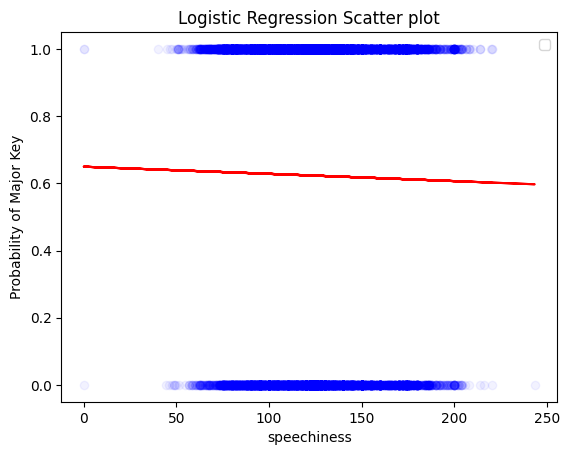

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Splitting the dataset into training and testing sets
X = spotify_data_cleaned[['valence']]
y = spotify_data_cleaned['mode']
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.3, random_state=Nnumber)

# Conducting the Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_log, y_train_log)

# Plotting the graph of the results of the logistic regression
# Scatter plot of the actual data
plt.scatter(X_test_log, y_test_log, color='blue', alpha=0.05)

# Predicting probabilities using the logistic regression model
y_pred_prob = log_reg.predict_proba(X_test_log)[:, 1]

# Plotting the logistic regression curve
plt.plot(X_test_log, y_pred_prob, color='red')
plt.title('Logistic Regression Scatter plot')
plt.xlabel('Valence')
plt.ylabel('Probability of Major Key')
plt.legend()
plt.show()

#Confusion Metrix
from sklearn import metrics
y_pred = log_reg.predict(X_test_log)
confusion_matrix = metrics.confusion_matrix(y_test_log, y_pred)

class_names = [0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Reality')
plt.xlabel('Prediction')
plt.show()

# AUC
auc_score = roc_auc_score(y_test_log, y_pred_prob)
print("AUC for valence:", auc_score)

print()

# Find a better predictor
new_features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'tempo']
feature_performance = {}
from sklearn.metrics import roc_auc_score, confusion_matrix
for feature in new_features:
    X_best = spotify_data_cleaned[[feature]]
    y_best = spotify_data_cleaned['mode']
    X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y_best, test_size=0.3, random_state=Nnumber)

    model = LogisticRegression()
    model.fit(X_train_best, y_train_best)
    y_pred_prob_best = model.predict_proba(X_test_best)[:, 1]
    auc_score_best = roc_auc_score(y_test_best, y_pred_prob_best)
    
    y_pred_best = model.predict(X_test)
    conf_matrix_best = confusion_matrix(y_test_best, y_pred_best)

    # Store results
    feature_performance[feature] = {'AUC': auc_score_best, 'Confusion Matrix': conf_matrix_best}

print(feature_performance)

#Find a better predictor with highest AUC
best_feature = None
highest_auc = 0

for feature, metrics in feature_performance.items():
    if metrics['AUC'] > highest_auc:
        highest_auc = metrics['AUC']
        best_feature = feature

print("Best Feature:", best_feature)
print("AUC:", highest_auc)
plt.scatter(X_test_best, y_test_best, color='blue', alpha=0.05)
plt.plot(X_test_best, y_pred_prob_best, color='red')
plt.title('Logistic Regression Scatter plot')
plt.xlabel(best_feature)
plt.ylabel('Probability of Major Key')
plt.legend()
plt.show()

In [14]:
#Using 10 song features
# Map the qualitative genre labels to numerical labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
spotify_data_cleaned["genre_labeled"] = label_encoder.fit_transform(spotify_data_cleaned['track_genre'])

#Splitting the dataset into training and testing sets
X_genre = spotify_data_cleaned[features]
y_genre = spotify_data_cleaned["genre_labeled"]
X_train_genre, X_test_genre, y_train_genre, y_test_genre = train_test_split(X_genre, y_genre, test_size=0.3, random_state=Nnumber)

#Performing a classification tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=Nnumber)
tree_model.fit(X_train_genre, y_train_genre)

# Find AUC
y_pred_prob_genre = tree_model.predict_proba(X_test_genre)
auc_genre = roc_auc_score(y_test_genre, y_pred_prob_genre, multi_class='ovr')
print("AUC of using 10 song features in question 1 directly:", auc_genre)

#Using principal components
#Splitting the dataset into training and testing sets
X_PC = principal_components
y_PC = spotify_data_cleaned["genre_labeled"]
X_train_PC, X_test_PC, y_train_PC, y_test_PC = train_test_split(X_PC, y_PC, test_size=0.3, random_state=Nnumber)

#Performing a classification tree
tree_model = DecisionTreeClassifier(random_state=Nnumber)
tree_model.fit(X_train_PC, y_train_PC)

# Find AUC
y_pred_prob_PC = tree_model.predict_proba(X_test_PC)
auc_PC = roc_auc_score(y_test_PC, y_pred_prob_PC, multi_class='ovr')
print("AUC of using principal components extracted in question 8:", auc_PC)

AUC of using 10 song features in question 1 directly: 0.6319642483113659
AUC of using principal components extracted in question 8: 0.6201054256426658


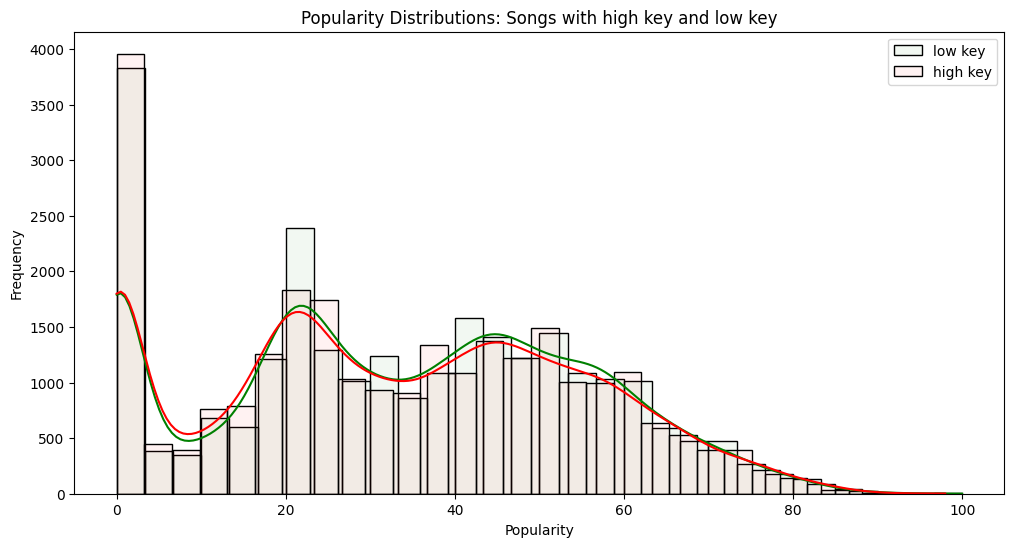

U statistic: 343690333.0
p-value: 0.0008655569902940957
Median of popularity for songs with low key: 33.0
Median of popularity for songs with high key: 32.0


In [15]:
#label the key to 0-5 for low and 6-11 for high
spotify_data_cleaned['key_label'] = ['high' if key > 5 else 'low' for key in spotify_data_cleaned['key']]

# Find the distributions of popularity for high key and low key
plt.figure(figsize=(12, 6))
sns.histplot(data=spotify_data_cleaned[spotify_data_cleaned['key_label'] == 'low']['popularity'], color='green', kde=True, label='low key', bins=30, alpha=0.05)
sns.histplot(data=spotify_data_cleaned[spotify_data_cleaned['key_label'] == 'high']['popularity'], color='red', kde=True, label='high key', bins=30, alpha=0.05)

plt.title('Popularity Distributions: Songs with high key and low key')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

popularity_low = spotify_data_cleaned[spotify_data_cleaned['key_label'] == 'low']['popularity']
popularity_high = spotify_data_cleaned[spotify_data_cleaned['key_label'] == 'high']['popularity']

# Generating the Mann-Whitney U test
u_statistic_key, p_value_key = mannwhitneyu(popularity_low, popularity_high, alternative='two-sided')

print("U statistic: ", end = "")
print(u_statistic_key)
print("p-value: ", end = "")
print(p_value_key)

# Find the median popularity for songs with low key and high key to compare
median_popularity_low = popularity_low.median()
median_popularity_high = popularity_high.median()

print("Median of popularity for songs with low key: ", end = "")
print(median_popularity_low)
print("Median of popularity for songs with high key: ", end = "")
print(median_popularity_high)